# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

------------
## Drop na

In [3]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [5]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [6]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [7]:
## your code here
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, 
                                               test_size=.25, 
                                               shuffle=True, 
                                               random_state=np.random.seed(1234))
x_train.shape


(81486, 10)

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [8]:
## your code here
import sklearn.linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib as plt

#实例化一个标准函数类。
iden = StandardScaler()
#输入标准化模板
iden.fit(x_train)
#生成标准化的数组
X_train_std = iden.transform(x_train)
X_test_std = iden.transform(x_test)

#使用模型计算
#linear_model.LogisticRegression()是一个类，下面的算法实现都是从类的实例化开始的。
#daul是选择惩罚函数形式，它需要传入一个bool值。
#C是惩罚项系数倒数，它决定了在惩罚项在损失函数的权重，c越大惩罚项对模型的影响就越小，过拟合倾向越大，欠拟合倾向越小。
#fit_intercept是否添加常数项
#random_state参数生成随机数的方式，可以是整数或numpy.random.randomState实例
LG=sklearn.linear_model.LogisticRegression(C=10.0, 
                                           max_iter=10,
                                           random_state=np.random.seed())
LG.fit(X_train_std,y_train)
#输出预测结果
y_LG_pred=LG.predict(x_test)
y_LG_pred2=LG.predict(x_train)

LG.coef_

array([[-0.02491961, -0.32868909,  1.20804458,  0.42701328, -0.12762538,
        -0.07764521,  0.2785668 , -0.43958502, -1.22289771,  0.13003486]])

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [9]:
## your code here
#导入决策树计算包
from sklearn.tree import DecisionTreeClassifier
#criterion：选择衡量分割质量的函数，有三种选择。
#max_depth：树的最大深度。
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=5,
                              random_state=0)
tree.fit(x_train, y_train)

y_tree_pred=tree.predict(x_test)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [10]:
## your code here
from sklearn.ensemble import RandomForestClassifier

#n_estimators：应是随机森林中tree的数目。
#n_jobs：并行训练多少个job。
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train, y_train)

y_froest_pred=forest.predict(x_test)

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [11]:
from sklearn.svm import SVC
#这里模型跑的比较慢，由于是练习就选择了10000个数据训练,准确率也还行。
#kernel:支持向量机超平面分割的关机是额外维度的生成，kernel可以指定生成方式，下面采用线性模型。

svm = SVC(kernel='linear',
          random_state=0, 
          C=10.0)
print(X_train_std.shape)
svm.fit(X_train_std[0:10_000], y_train[0:10_000])
y_svm_pred=svm.predict(x_test)

(81486, 10)


### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [12]:
## your code here
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors:参与投票的点数
#P选择距离的衡量。1 Manhattan distance；2 Euclidean distance ；others：Minkowski distance 
knn = KNeighborsClassifier(n_neighbors=5,
                           p=3,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
y_knn_pred=knn.predict(x_test)

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [13]:
## your code here
print(f'train_accuracy: {accuracy_score(y_train, y_LG_pred2):.2f}')
print(f'test_Accuracy: {accuracy_score(y_test, y_LG_pred):.2f}')

train_accuracy: 0.93
test_Accuracy: 0.93


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [14]:
## your code here
print(f'test_Accuracy: {accuracy_score(y_test, y_tree_pred):.2f}')

test_Accuracy: 0.93


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [15]:
## your code here
print(f'test_Accuracy: {accuracy_score(y_test,y_froest_pred):.2f}')

test_Accuracy: 0.93


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [16]:
## your code here
print(f'test_Accuracy: {accuracy_score(y_test,y_svm_pred):.2f}')

test_Accuracy: 0.93


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [17]:
## your code here
print(f'test_Accuracy: {accuracy_score(y_test, y_knn_pred):.2f}')

test_Accuracy: 0.93


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

confusion_matrix: [[25238     1]
 [ 1923     0]]
confusion_matrix: [[25239     0]
 [ 1923     0]]


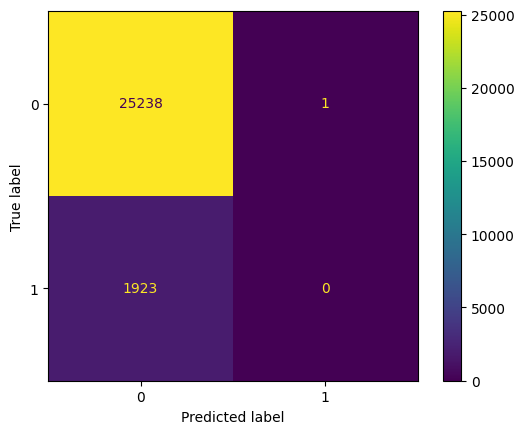

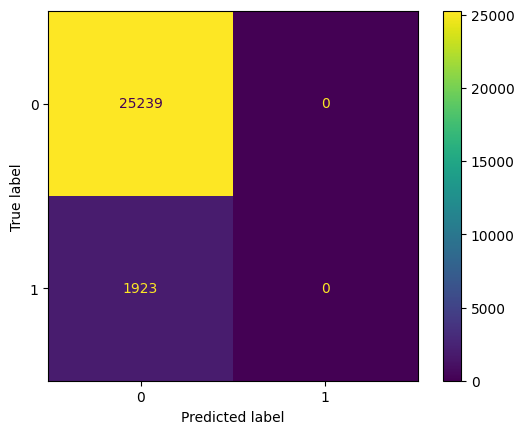

In [18]:
## your code here
import matplotlib as plt
#导入混淆矩阵包
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score
#计算Logistic regression混淆矩阵
cm = confusion_matrix(y_test, y_LG_pred , labels=LG.classes_)
print(f'confusion_matrix: {cm}')
#画出混淆矩阵
dis_LG = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LG.classes_)
dis_LG.plot()

#计算SVM混淆矩阵
cm2 = confusion_matrix(y_test, y_svm_pred, labels=svm.classes_)
print(f'confusion_matrix: {cm2}')
dis_SVM = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=svm.classes_)
dis_SVM.plot()

答：两个模型都是倾向输出0，0判为1是几乎没有的，同时1判断为1的几率也比较小，模型可能存在过拟合；准确率高的可能与测试集里的0与1的数量有关。

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

test_Accuracy: 0.93
precision_score: 0.42
recall_score: 0.03


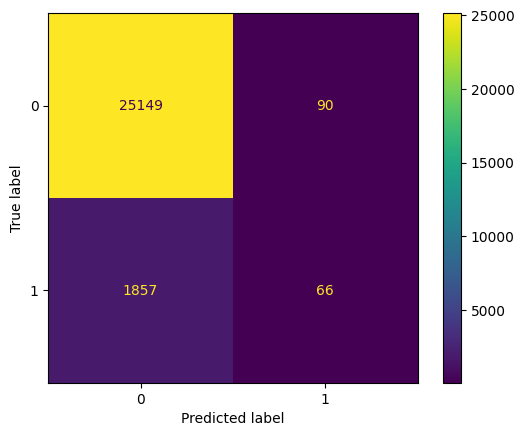

In [19]:
## your code here
LG2=sklearn.linear_model.LogisticRegression(C=10.0, 
                                           max_iter=10,
                                           random_state=np.random.seed(0))
LG2.fit(X_train_std,y_train)
#输出预测结果
y_LG_pred3=1/(1+np.exp(-X_test_std @ LG2.coef_.T-LG2.intercept_))
#转化为DataFrame便于数据操作
df=pd.DataFrame(y_LG_pred3)
#设置概率判定边界
y_LG_pred3=df>=.3
#输出结果
print(f'test_Accuracy: {accuracy_score(y_test, y_LG_pred3):.2f}')
print(f'precision_score: {precision_score(y_test,y_LG_pred3 ):.2f}')
print(f'recall_score: {recall_score(y_test, y_LG_pred3):.2f}')
#画出混淆矩阵
cm3 = confusion_matrix(y_test, y_LG_pred3, labels=LG.classes_)
dis_SVM = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels=LG.classes_)
dis_SVM.plot()